<a href="https://colab.research.google.com/github/HagarIbrahiem/Learning_purposes/blob/main/EDA_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A data transformation is the process of using a math expression to change the structure of our data. As we mentioned before, some models need data to fit a specific type of distribution for them to produce optimal results. Unfortunately, the data we get in the real world, doesn’t always fit the distributions our models call for.



In [199]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/'My Drive'/ML_Process_Data_Files/Section_7_Feature_Engineering
df = pd.read_csv("drive/My Drive/ML_Process_Data_Files/Section_7_Feature_Engineering/vehicles_sample.csv")

Mounted at /content/drive
AB_NYC_2019.csv  airbnb_dataset_ml_process.csv	vehicles_sample.csv


In [49]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,car_age
0,7314973697,https://reno.craigslist.org/cto/d/hayward-2006...,reno / tahoe,https://reno.craigslist.org,14500,2006.0,chevrolet,c4500 kodiak,good,NaN,...,NaN,white,https://images.craigslist.org/00r0r_2PNOZAxrzS...,2006 Chevy c4500 Duramax Diesel 12ft stake be...,NaN,ca,37.633200,-122.09710,2021-04-30T12:36:10-0700,16.0
1,7313530720,https://okaloosa.craigslist.org/ctd/d/crestvie...,okaloosa / walton,https://okaloosa.craigslist.org,9999,2011.0,volvo,s80 3.2,excellent,6 cylinders,...,NaN,silver,https://images.craigslist.org/00t0t_6N46hVKcxz...,"WE ARE SELLING A 2011 VOLVO S80 4 DOOR SEDAN, ...",NaN,fl,30.742272,-86.56392,2021-04-27T15:46:02-0500,11.0
2,7316418589,https://portland.craigslist.org/clk/cto/d/vanc...,portland,https://portland.craigslist.org,2250,2004.0,cadillac,NaN,NaN,NaN,...,NaN,NaN,https://images.craigslist.org/00V0V_5NLY3gG93F...,2004 Cadillac Deville runs and drives excell...,NaN,or,45.664400,-122.52120,2021-05-03T13:44:57-0700,18.0
3,7314880218,https://sanantonio.craigslist.org/ctd/d/san-an...,san antonio,https://sanantonio.craigslist.org,9899,2013.0,volkswagen,tiguan,NaN,4 cylinders,...,SUV,blue,https://images.craigslist.org/00X0X_jqyuALGnjG...,You can now complete your application online o...,NaN,tx,29.387500,-98.52450,2021-04-30T12:02:38-0500,9.0
4,7316717517,https://sarasota.craigslist.org/cto/d/sarasota...,sarasota-bradenton,https://sarasota.craigslist.org,1995,2006.0,nissan,quest,good,6 cylinders,...,mini-van,silver,https://images.craigslist.org/00e0e_eHHYRRAIqZ...,Clear title. 2006 Nissan Quest. 6 cylnder 3.5 ...,NaN,fl,27.336900,-82.51280,2021-05-04T10:58:16-0400,16.0


In [51]:
df.describe()
# Columns we may want to normalize 
# Price, Year, Odometer

,id,price,year,odometer,county,lat,long,car_age
count,2.000000e+04,2.000000e+04,19951.000000,1.981400e+04,0.0,19702.000000,19702.000000,19951.000000
mean,7.311462e+09,1.761475e+04,2011.217282,9.865501e+04,NaN,38.483050,-94.647057,10.782718
std,4.484711e+06,1.998158e+04,9.575279,2.363314e+05,NaN,5.889468,18.358730,9.575279
min,7.217189e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-56.527029,-159.365530,0.000000
25%,7.308054e+09,5.950000e+03,2008.000000,3.747300e+04,NaN,34.610000,-111.937599,5.000000
50%,7.312474e+09,1.385000e+04,2014.000000,8.400000e+04,NaN,39.140834,-88.230050,8.000000
75%,7.315259e+09,2.659000e+04,2017.000000,1.323340e+05,NaN,42.370000,-80.705055,14.000000
max,7.317096e+09,1.234567e+06,2022.000000,1.000000e+07,NaN,64.878089,94.163200,122.000000


In [176]:
#let's just use a few features to create an example model and remove Nulls. Learn mnore about different imputation techniques in this other companion notebook. 
#pd.get_dummie() creates dummy variables for the categorical features (see this notebook for more on that)
df_example = df.loc[:,['price','car_age','odometer']].dropna()


In [177]:
from sklearn.model_selection import train_test_split

X = df_example.drop('price',axis =1 )
y = df_example[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train

,car_age,odometer
11333,13.0,137647.0
12960,5.0,41781.0
31,4.0,17105.0
11512,5.0,124457.0
13658,14.0,122000.0
...,...,...
11417,38.0,79618.0
12103,17.0,125000.0
5453,9.0,74386.0
875,3.0,19385.0


Let's look at the shape of our data and if it has any outliers before we do our transforms

In [54]:
df_example.describe()

,price,car_age,odometer
count,11362.000000,11362.000000,1.136200e+04
mean,17654.337969,11.007305,9.674347e+04
std,13943.845629,9.763746,2.579321e+05
min,0.000000,0.000000,0.000000e+00
25%,6500.000000,5.000000,3.278425e+04
50%,14590.000000,9.000000,8.065200e+04
75%,26990.000000,14.000000,1.330320e+05
max,204999.000000,122.000000,1.000000e+07


**Explore odometer Feature**

max odometer: 10000000.0
median odometer: 80652.0
Difference: 9919348.0


<AxesSubplot:>

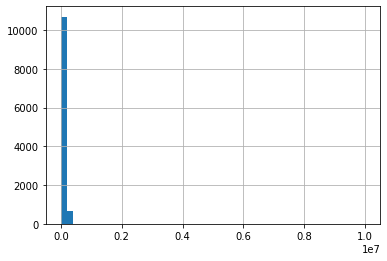

In [55]:
# visual of the distribution of the odometer without any outlier removal (see boxplots above)
#data is clearly impacted heavily by outliers 
print("max odometer: " + str(df_example['odometer'].max()))
print("median odometer: " + str(df_example['odometer'].median()))
print("Difference: " + str(df_example['odometer'].max() - df_example['odometer'].median()))

df_example['odometer'].hist(bins=50)


max odometer: 268000.0
median odometer: 80000.0
Difference: 188000.0


<AxesSubplot:>

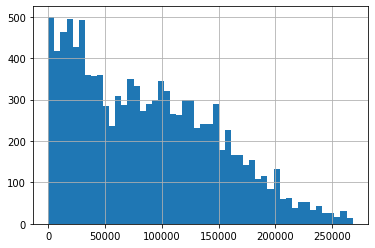

In [56]:
#shape of the data after very basic oultier removal (kept only data < 99th percentile)
df_example_copy = df_example['odometer'].copy()
df_example_copy['odometer'] = df_example[df_example['odometer'] < df_example['odometer'].quantile(0.99)]['odometer']

# compute after removing outliers
print("max odometer: " + str(df_example_copy['odometer'].max()))
print("median odometer: " + str(df_example_copy['odometer'].median()))
print("Difference: " + str(df_example_copy['odometer'].max() - df_example_copy['odometer'].median()))

df_example_copy['odometer'].hist(bins=50)

#clear right skew in data 

**Explore Price Feature**

max price: 204999
median price: 14590.0
Difference: 190409.0


<AxesSubplot:>

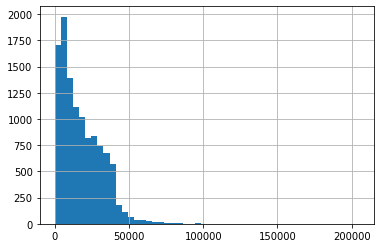

In [57]:
print("max price: " + str(df_example['price'].max()))
print("median price: " + str(df_example['price'].median()))
print("Difference: " + str(df_example['price'].max() - df_example['price'].median()))

df_example['price'].hist(bins=50)


max price: 58950
median price: 14288.0
Difference: 44662.0


<AxesSubplot:>

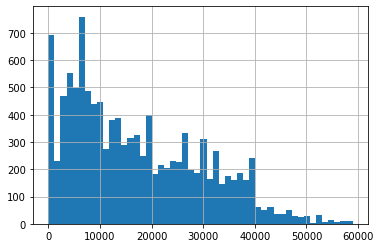

In [58]:


#shape of the data after very basic oultier removal (kept only data < 99th percentile)
df_example_copy = df_example['price'].copy()
df_example_copy['price'] = df_example[df_example['price'] < df_example['price'].quantile(0.99)]['price']

# compute after removing outliers
print("max price: " + str(df_example_copy['price'].max()))
print("median price: " + str(df_example_copy['price'].median()))
print("Difference: " + str(df_example_copy['price'].max() - df_example_copy['price'].median()))

df_example_copy['price'].hist(bins=50)

#clear right skew in data 

Explore Car_age Feature

max age: 122.0
median age: 113.0
Difference: 9.0


<AxesSubplot:>

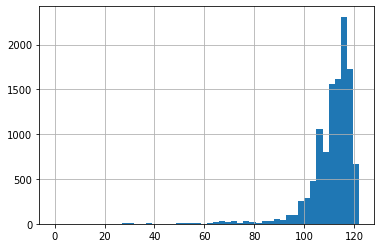

In [59]:
# Let's do some simple feature engineering to get how old the cars are

df_example['car_age'] = df_example['car_age'].max() - df_example['car_age']

print("max age: " + str(df_example['car_age'].max()))
print("median age: " + str(df_example['car_age'].median()))
print("Difference: " + str(df_example['car_age'].max() - df_example['car_age'].median()))


df_example['car_age'].hist(bins=50)

max age: 119.0
median age: 113.0
Difference: 6.0


<AxesSubplot:>

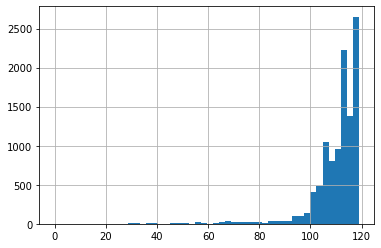

In [60]:
# Let's do some simple feature engineering to get how old the cars are


df_example_copy['car_age']  = df_example[ df_example['car_age'] < df_example['car_age'].quantile(0.99)]['car_age']

print("max age: " + str(df_example_copy['car_age'].max()))
print("median age: " + str(df_example_copy['car_age'].median()))
print("Difference: " + str(df_example_copy['car_age'].max() - df_example_copy['car_age'].median()))


df_example_copy['car_age'].hist(bins=50)

##Transformation

Before we get into transformation, let’s quickly talk about normal distribution. Normal distribution is a probability and statistical concept widely used in scientific studies for its many benefits. Just to name a few of these benefits:
- normal distribution is simple. Its mean, median and mode have the same value
- it can be defined with just two parameters: mean and variance. 
- It also has important mathematical implications such as the Central Limit Theorem.

Unfortunately, our real-life datasets do not always follow the normal distribution. They are often so skewed making the results of our statistical analyses invalid. That’s where Log Transformation comes in.

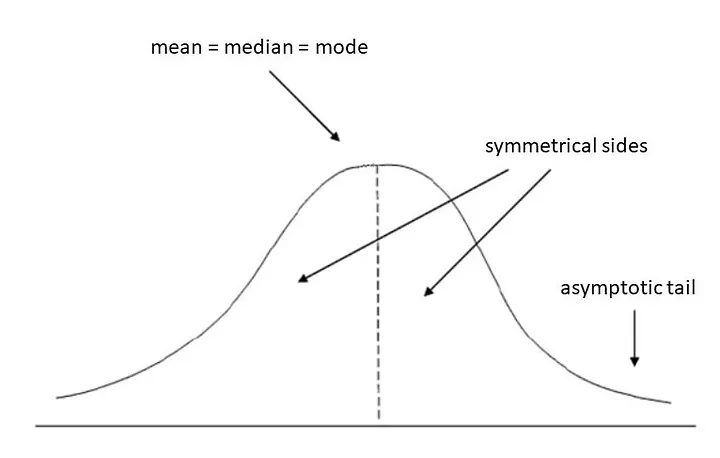

When the assumption of data normally distributed is violated or the relationship between the dependent and independent variables in the case of a linear model is not linear, in such situations some transformation methods may help the data set follow a normal distribution , such transformation may include:

1- Log Transformation

2- Square Root Transformation

3- Exponential Transformation

4- Box Cox Transformation

###1- Logarithmic Transformation

Log transformation is a data transformation method in which it replaces each variable x with a log(x). The choice of the logarithm base is usually left up to the analyst and it would depend on the purposes of statistical modeling. In this notebook, we will focus on the natural log transformation. The nature log is denoted as ln.



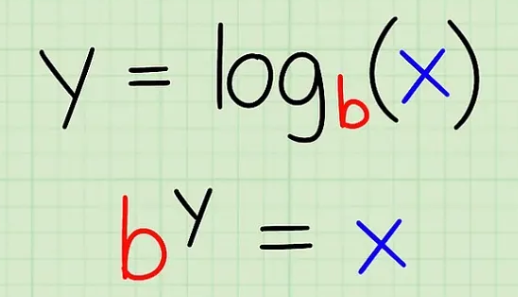


 When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data.

  Typically, we apply logarithmic transformations to our variables when our variables are heavily right skewed, driven by a few outliers.

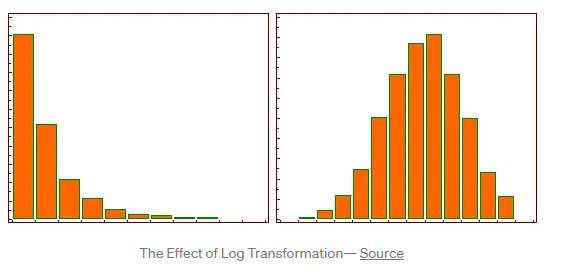

Let's see how these transformations impact some of our skewed data (Odometer & Price)

In [81]:
# train data before Log Transformation
print (X_train.head())
print (y_train.head())


       car_age  odometer
11333     13.0  137647.0
12960      5.0   41781.0
31         4.0   17105.0
11512      5.0  124457.0
13658     14.0  122000.0
       price
11333  15495
12960      0
31     31990
11512      0
13658  20990


In [77]:
from sklearn.preprocessing import FunctionTransformer

def log_transform(x):
    return np.log(x + 1)

transformer_log = FunctionTransformer(log_transform)
transformed_log = transformer_log.fit_transform(X_train)

transformer_logp = FunctionTransformer(log_transform)
transformed_logp = transformer_logp.fit_transform(y_train)

In [87]:
# train data after Log Transformation
print (transformer_log.feature_names_in_) #X_train
print (transformed_logp) #y_train
# ln(15495)=9.648

['car_age' 'odometer']
           price
11333   9.648337
12960   0.000000
31     10.373210
11512   0.000000
13658   9.951849
...          ...
11417   9.998843
12103   9.301186
5453   10.110054
875     9.772866
15982   8.691315

[15813 rows x 1 columns]


array([<AxesSubplot:title={'center':'odometer'}>], dtype=object)

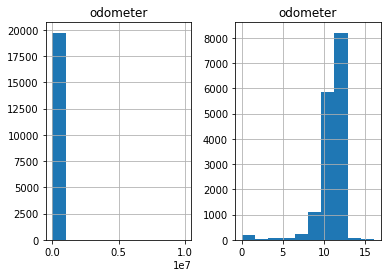

In [106]:
fig, axes = plt.subplots(1, 2)


df_example.hist('odometer', ax=axes[0] ) ##Before Log_transformation
transformed_log.hist('odometer',  ax=axes[1]) ##After Log_transformation

#as you can see, using log transform in this case actually creates some right skew. 
#It does almost completely normalize the outliers that were present , without the need to remove it as we did above


array([<AxesSubplot:title={'center':'car_age'}>], dtype=object)

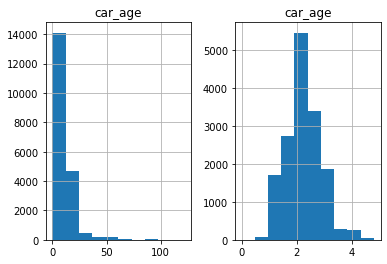

In [105]:
fig, axes = plt.subplots(1, 2)


df_example.hist('car_age', ax=axes[0] ) ##Before Log_transformation
transformed_log.hist('car_age',  ax=axes[1]) ##After Log_transformation


#as you can see, using log transform in this case actually creates some right skew. 
#It does almost completely normalize the outliers that were present , without the need to remove it as we did above


array([<AxesSubplot:title={'center':'price'}>], dtype=object)

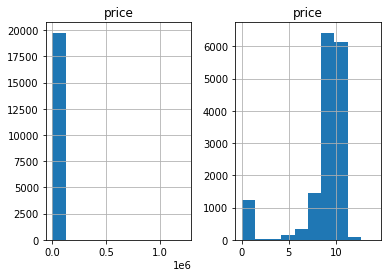

In [107]:
fig, axes = plt.subplots(1, 2)


df_example.hist('price', ax=axes[0] ) ##Before Log_transformation
transformed_logp.hist('price',  ax=axes[1]) ##After Log_transformation


#as you can see, using log transform in this case actually creates some right skew. 
#It does almost completely normalize the outliers that were present , without the need to remove it as we did above


###2-Square Root Transformation
Square Root transformations will compress the spread of your larger values but spread out your lower values. Log transformations have a similar effect but are much more aggressive

In [108]:
def sqrt_transform(x):
    return np.sqrt(x)

transformer_sqrt = FunctionTransformer(sqrt_transform)
transformed_sqrt = transformer_sqrt.fit_transform(X_train)

In [109]:
transformer_sqrtp = FunctionTransformer(sqrt_transform)
transformed_sqrtp = transformer_sqrt.fit_transform(y_train)

In [114]:
# train data after Log Transformation
print (transformed_sqrt) #X_train
print (transformed_sqrtp) #y_train
# sqrt(15495)=124.4789138770097

        car_age    odometer
11333  3.605551  371.008086
12960  2.236068  204.404012
31     2.000000  130.786085
11512  2.236068  352.784637
13658  3.741657  349.284984
...         ...         ...
11417  6.164414  282.166617
12103  4.123106  353.553391
5453   3.000000  272.737969
875    1.732051  139.230025
15982  4.000000  446.094160

[15813 rows x 2 columns]
            price
11333  124.478914
12960    0.000000
31     178.857485
11512    0.000000
13658  144.879260
...           ...
11417  148.323970
12103  104.642248
5453   156.805612
875    132.476413
15982   77.136243

[15813 rows x 1 columns]


In [113]:
np.sqrt(15495)

124.4789138770097

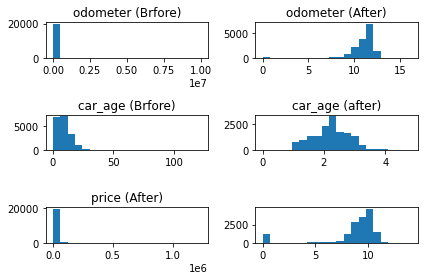

In [144]:
fig, ((ax0, ax1), (ax2, ax3) , (ax4, ax5)) = plt.subplots(nrows=3, ncols=2)
n_bins= 20

ax0.hist(df_example['odometer'], n_bins, histtype='bar')
ax1.hist(transformed_log['odometer'], n_bins, histtype='bar')
ax0.set_title('odometer (Brfore)')
ax1.set_title('odometer (After)')


ax2.hist(df_example['car_age'], n_bins, histtype='bar')
ax3.hist(transformed_log['car_age'], n_bins, histtype='bar')
ax2.set_title('car_age (Brfore)')
ax3.set_title('car_age (after)')


ax4.hist(df_example['price'], n_bins, histtype='bar')
ax5.hist(transformed_logp['price'], n_bins, histtype='bar')
ax4.set_title('price (Brfore)')
ax4.set_title('price (After)')

fig.tight_layout()
# fig=plt.figure(figsize=(8,6))
plt.show()



###3-Exponential Transformation

A close cousin of the log transform is the exponential transformation. There are many instances where you'd use an exponential transform:

- Use Exponential transformations when you want **to magnify small differences**, it Exponentially scales your data in order to zoom in on small differences
- Log and Exponential transformations are the inverse of each other.

 Anytime you apply a log transform to your target variable, you can apply an exponential transformation to revert it back to the original value.


In [150]:
def exp_transform(x):
    return np.exp(x)

transformer_exp = FunctionTransformer(exp_transform)
transformer_exp = transformer_exp.fit_transform(X_train)

In [152]:
transformer_expp = FunctionTransformer(exp_transform)
transformer_expp = transformer_expp.fit_transform(y_train)

In [153]:
# train data after Log Transformation
print (transformer_exp) #X_train
print (transformer_expp) #y_train

##so much IINF Data , as Exp Transform Magnify Data

            car_age  odometer
11333  4.424134e+05       inf
12960  1.484132e+02       inf
31     5.459815e+01       inf
11512  1.484132e+02       inf
13658  1.202604e+06       inf
...             ...       ...
11417  3.185593e+16       inf
12103  2.415495e+07       inf
5453   8.103084e+03       inf
875    2.008554e+01       inf
15982  8.886111e+06       inf

[15813 rows x 2 columns]
       price
11333    inf
12960    1.0
31       inf
11512    1.0
13658    inf
...      ...
11417    inf
12103    inf
5453     inf
875      inf
15982    inf

[15813 rows x 1 columns]


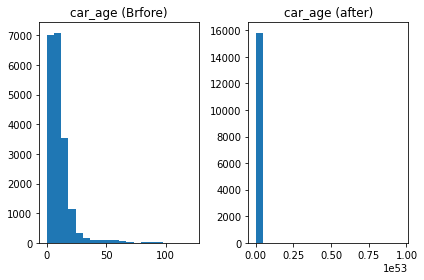

In [156]:
##Cant Plot odometer + price beacuse of the INF Values

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2)
n_bins= 20

# ax0.hist(df_example['odometer'], n_bins, histtype='bar')
# ax1.hist(transformer_exp['odometer'], n_bins, histtype='bar')
# ax0.set_title('odometer (Brfore)')
# ax1.set_title('odometer (After)')


ax0.hist(df_example['car_age'], n_bins, histtype='bar')
ax1.hist(transformer_exp['car_age'], n_bins, histtype='bar')
ax0.set_title('car_age (Brfore)')
ax1.set_title('car_age (after)')


# ax4.hist(df_example['price'], n_bins, histtype='bar')
# ax5.hist(transformer_expp['price'], n_bins, histtype='bar')
# ax4.set_title('price (Brfore)')
# ax4.set_title('price (After)')

fig.tight_layout()
# fig=plt.figure(figsize=(8,6))
plt.show()



###4-Box-Cox Transformation

- The Box-Cox transformation is a transformation that helps your dataset follow a normal distribution. Typically, we use Box-Cox transformation when our dataset is not normal, but close to being normal.

- The basic assumption of Box-Cox is **data must be positive (no negative values)** and also data should be continuous.

-  The assumption of any linear model is that relationship between the response variable Y and the predictor variable X is linear, however, this is not true all the time, so when the relationship between the dependent variable and independent variable is not linear and still wish to fit a linear model to the data then consider a Box-Cox transformation method , that's why Box-Cox transformation is a good option to transform our target variable so it resembles a normal distribution.
- Box-Cox aggregates multiple power transformers into a single transformer. You use lambda to adjust the transformation. Lambda varies from -5 to 5.

 **If we set lambda equal to zero, it becomes simply a log transformation.**

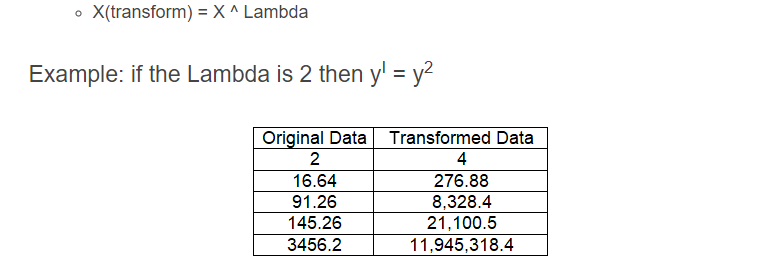

Generally , Box-Cox transformation is a statistical technique that transforms your target variable so that your data closely resembles a normal distribution.

In many statistical techniques, we assume that the errors are normally distributed. This assumption allows us to construct confidence intervals and conduct hypothesis tests. By transforming your target variable, we can hopefully normalize our errors, if they are not already normal.

In [194]:
## Redo the pipeline for this example
from sklearn.model_selection import train_test_split

## Clip Outliers
df_example = df_example[df_example['price'] < np.percentile(df_example['price'], 95)]

## Remove prices that are 0 to make notebook work
df_example = df_example[df_example['price'] > 0].copy()

X = df_example.drop('price',axis =1 )
y = df_example[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

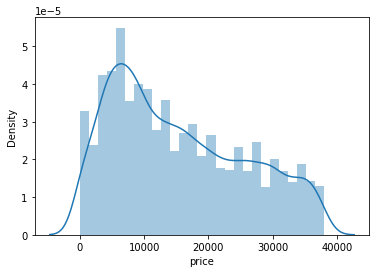

In [216]:
sns.distplot(y_train['price'])

We choose the value of lambda that provides the best approximation for the normal distribution of our response variable.

SciPy has a boxcox function that will choose the optimal value of lambda for us.

Simply pass a 1-D array into the function and it will return the Box-Cox transformed array and the optimal value for lambda

In [212]:
from scipy.stats import boxcox

boxcox_y_train = boxcox(y_train['price'], lmbda = None)


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

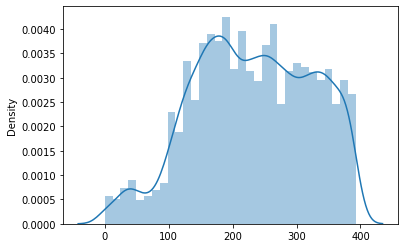

In [215]:
sns.distplot(boxcox_y_train[0])

In [197]:
print("Lambda Parameter {0}".format(boxcox_y_train[1]))

Lambda Parameter 0.5015312279150526


**Limits of Box-Cox Transformation**
- If interpretation is your goal, then the Box-Cox transformation may be a poor choice. If lambda is a non-zero number, then the transformed target variable may be more difficult to interpret than if we simply applied a log transform.

- A second issue is that the Box-Cox transformation usually gives the median of the forecast distribution when we revert the transformed data to its original scale. Occasionally, we want the mean, not the median, and there are other ways to do that.

##Resources

- https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

- https://builtin.com/data-science/box-cox-transformation-target-variable